In [55]:
import os
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [56]:
os.getcwd()
os.chdir('C:\\Users\\John Lang\\Desktop\\Learning')

df=pd.read_csv('bankloan.csv')


In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
df=df.dropna()
df.isna().any()


Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [59]:
df=df.drop('Loan_ID', axis=1)

In [60]:
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)

In [61]:
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [62]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y


In [63]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [64]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y,9613.0


In [65]:
# Predicting - Loan status
# X is everything else
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis=1)

In [66]:
# Built infunction convert evrything into 1 and zero
dm_X=pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1, N=0))
pre_y.shape

(480,)

In [67]:
dm_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,6091.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,3000.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,4941.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,6000.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,9613.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,2900.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,4106.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,8312.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,7583.0,0,1,0,1,1,0,1,0,0,0,1


In [71]:
smote = SMOTE('minority')
X1, y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [72]:
Counter(y)

Counter({0: 332, 1: 332})

In [102]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [103]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(6, activation='relu', kernel_initializer='random_normal'))
# Final is sigmoid - this is a 0 or 1
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
# Binary cross_entropy since this is a binary model, Adam - good right out of the box
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
# Epoch = forward and back propogations, using batch sizes
classifier.fit(X_train, y_train, batch_size=20, epochs=100, verbose=0)
eval_model=classifier.evaluate(X_train, y_train)
eval_model

531/531 [==============================] - 0s 338us/step


[0.1989927543029049, 0.9114877583841371]

Loss Value of 19.90%, Accuracy of 91.15%

In [104]:
y_pred = classifier.predict(X_test)
# IF prediction above 0.55, assume to yes on load
y_pred = (y_pred>0.52)
#Above is a hyperparameter to be automated

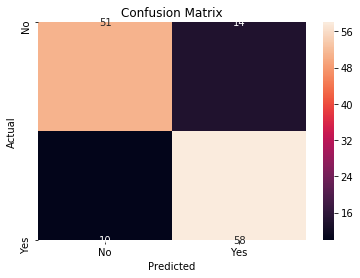

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Predicted'); ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No','Yes']); ax.yaxis.set_ticklabels(['No','Yes']);

** CHAPTER 2**


Pickle the ML Model - once made, you can ssave and train it

Look at pickles and k-folds

In [107]:
import pickle
from sklearn.externals import joblib
filename = 'loan_model.pkl'
#Take classifier and pickle the dump - save it
joblib.dump(classifier, filename)

['loan_model.pkl']

WHEN IMPORTING MODEL TO USE AGAIN:

import pickle
from sklearn.externals import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

mdl = joblib.load('loan_model.pkl')
#model has been loaded

#bring in new test data
x=pd.read_excel('test.xlsx')

#scale x
x_test = sc.fit_transform(x)

#referencing modle to bring in. If y_pred is above 0.58. assume to predicted
y_pred=mdl.predict(x_test)
y_pred=(y_pred>0.58)

#create into dataframe of approved and rejected under a column 'Status'
val=pd.DataFrame(y_pred, columns=['Status'])
val=val.replace({True:'Approved', False:'Rejected'})


In [112]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
cvscores = []
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
    model.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(6, activation='relu', kernel_initializer='random_normal'))
# Final is sigmoid - this is a 0 or 1
    model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
# compile model - Binary cross_entropy since this is a binary model, Adam - good right out of the box
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
# Epoch = forward and back propogations, using batch sizes
    model.fit(X[train], y[train], epochs=100, verbose=0)
#Evaluate model
    scores = model.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1]*100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


acc: 82.88%
acc: 82.35%
acc: 75.57%
80.27% (+/- 3.33%)


In [114]:
#Data for pickle input - "Form" fill out

data = {
    "Dependents":1,
    "ApplicantIncome":458300,
    "CoapplicantIncome":15080,
    "LoanAmount":128000,
    "Loan_Amount_Term":360,
    "Credit_History":1,
    "Gender_Female":0,
    "Gender_Male":1,
    "Married_No":0,
    "Married_Yes":1,
    "Education_Graduate":1,
    "Self_Employeed_No":1,
    "Self_Employed_Yes":0,
    "Property_Area_Rural":1,
    "Property_Area_Semiurban":0,
    "Property_Area_Urban":0
}